#Laboratoire d'introduction au filtrage

## Objectifs:
Ce laboratoire a pour but de vous initier au filtrage de signaux temporels avec Matlab. Nous allons travailler avec un signal simulé qui contient plusieurs sources, une d'intérêt et d'autres qui sont du bruit. 
 - Nous allons tout d'abord nous familiariser avec les différentes sources de signal, en temps et en fréquence. 
 - Nous allons ensuite chercher un filtrage qui permette d'éliminer le bruit sans altérer de maniére forte le signal. 
 - Enfin, nous évaluerons l'impact d'une perte de résolution temporelle sur notre capacité à débruiter le signal, lié au phénomène de repliement de fréquences (aliasing). 

Pour réaliser ce laboratoire, il est nécessaire de récupérer la
ressource suivante sur [studium](https://studium.umontreal.ca/):

-   labo7_filtrage.zip: cette archive contient plusieurs codes et jeux de données. SVP décompressez l'archive et copiez les fichiers dans votre répertoire de travail Matlab.

De nombreuses portions du labo consiste à modifier un code réalisé dans une autre question. Il est donc fortement conseillé d'ouvrir un nouveau fichier dans l'éditeur matlab, et d'exécuter le code depuis l'éditeur, de façon à pouvoir copier des paragraphes de code rapidement. Ne pas tenir compte et ne pas exécuter cette partie du code:

In [17]:
%matplotlib inline
from pymatbridge import Octave
octave = Octave()
octave.start()
%load_ext pymatbridge

Starting Octave on ZMQ socket ipc:///tmp/pymatbridge
Send 'exit' command to kill the server
.Octave started and connected!
The pymatbridge extension is already loaded. To reload it, use:
  %reload_ext pymatbridge


## Section 1: Exemple de signaux, temps et fréquence

#### 1. Commençons par générer un signal d'intêret:

Représentez `noyau` et `signal` en temps, à l'aide de la commande `plot`. Utiliser les temps d'acquisition corrects, et labéliser les axes (xlabel, ylabel). Comment est généré `signal`? reconnaissez vous le processus employé? Est ce que le signal est périodique? si oui, quelle est sa période? Peut-on trouver la réponse dans le code? 

#### 2. Représenter le contenu fréquentiel de `signal` avec la commande `Analyse_Frequence_Puissance`. 

Utilisez la commande `ylim` pour ajuster les limites de l'axe y et pouvoir bien observer le signal. Notez que l'axe y (puissance) est en échelle log (dB). Quelles sont les fréquences principales contenues dans le signal? Etait-ce attendu?

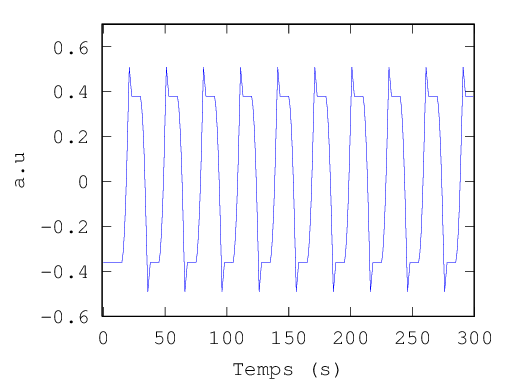

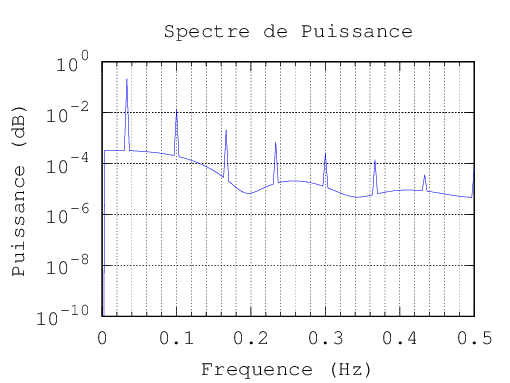

In [2]:
%%matlab

%% Définition du signal d'intêret
% fréquence du signal
freq = 1;  
% on crée des blocs off/on de 15 secondes
bloc = repmat([zeros(1,15*freq) ones(1,15*freq)],[1 10]); 
% les temps d'acquisition
ech = (0:(1/freq):(length(bloc)/freq)-(1/freq)); 
% ce paramètre fixe le pic de la réponse hémodynamique
pic = 5; 
% noyau de réponse hémodynamique
noyau = [linspace(0,1,(pic*freq)+1) linspace(1,-0.3,(pic*freq)/2) linspace(-0.3,0,(pic*freq)/2)]; 
noyau = [zeros(1,length(noyau)-1) noyau]; 
% normalisation du noyau
noyau = noyau/sum(abs(noyau)); 
% convolution du bloc avec le noyau
signal = conv(bloc,noyau,'same'); 
% on fixe la moyenne de la réponse à zéro
signal = signal - mean(signal); 

%% représentation en temps
figure
plot(ech,signal)
xlim([-1 max(ech)+1])
ylim([-0.6 0.7])
xlabel('Temps (s)')
ylabel('a.u')

%% représentation en fréquences
figure
Analyse_Frequence_Puissance(signal,ech);
ylim([10^(-10) 1])

#### 3. Répétez les questions 1.1 et 1.2 avec un bruit dit blanc, généré ci dessous.
Pourquoi est ce que ce bruit porte ce nom?

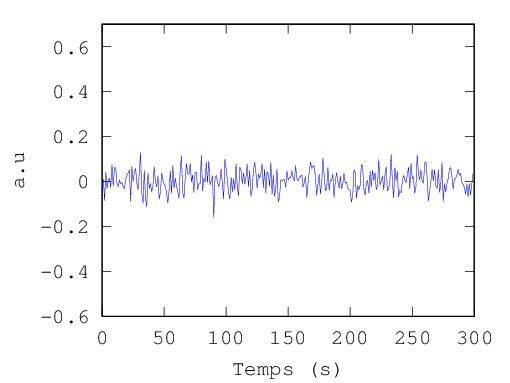

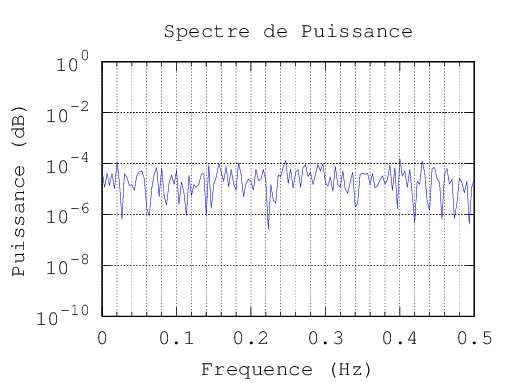

In [3]:
%%matlab

%% définition du bruit blanc
bruit = 0.05*randn(size(signal));

%% représentation en temps
figure
plot(ech,bruit)
ylim([-0.6 0.7])
xlabel('Temps (s)')
ylabel('a.u')

%% représentation en fréquences
figure
Analyse_Frequence_Puissance(bruit,ech);
ylim([10^(-10) 1])

#### 4. Bruit respiratoire.
Répétez les les questions 1.1 et 1.2 avec un bruit dit respiratoire, généré ci dessous. Est ce une simulation raisonnable de variations liées à la respiration? pourquoi?

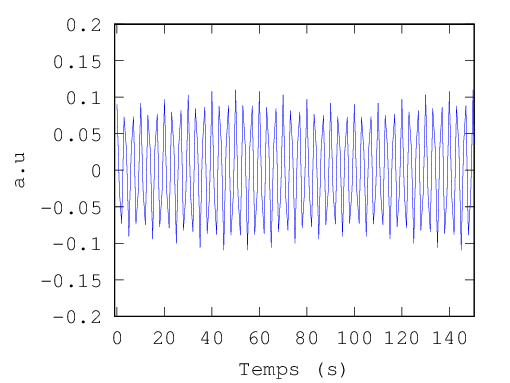

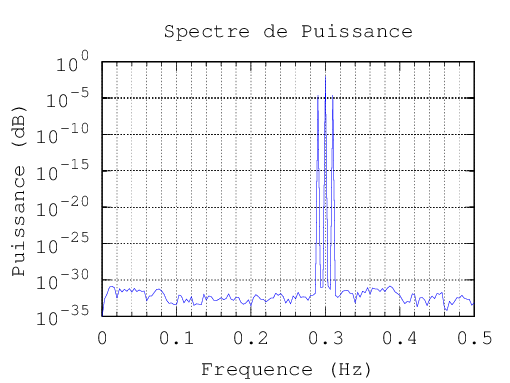

In [4]:
%%matlab

%% définition du signal de respiration
% fréquence de la respiration
freq_resp = 0.3; 
% un modéle simple (cosinus) des fluctuations liées à la respiration
resp = cos(2*pi*freq_resp*ech/freq); 
% fréquence de modulation lente de l'amplitude respiratoire
freq_mod = 0.01; 
% modulation de l'amplitude du signal lié à la respiration
resp = resp.*(ones(size(resp))-0.1*cos(2*pi*freq_mod*ech/freq)); 
% on force une moyenne nulle, et une amplitude max de 0.1
resp = 0.1*(resp-mean(resp)); 

%% représentation en temps
figure
plot(ech,resp)
xlim([-1 max(ech)/2+1])
xlabel('Temps (s)')
ylabel('a.u')

%% représentation en fréquences
figure
[ech_f,signal_f,signal_af,signal_pu] = Analyse_Frequence_Puissance(resp,ech);
set(gca,'yscale','log');
ylim([10^(-35) 1])

#### 5. Ligne de base.
Répétez les les questions 1.1 et 1.2 avec une dérive de la ligne de base, telle que générée ci dessous.

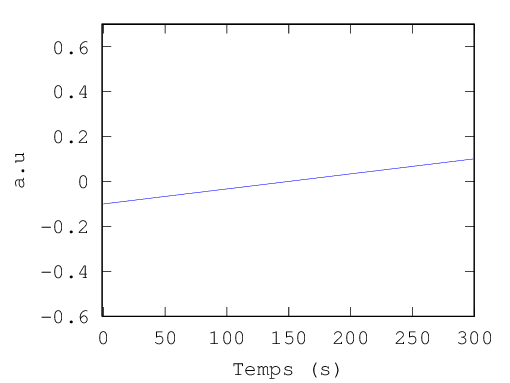

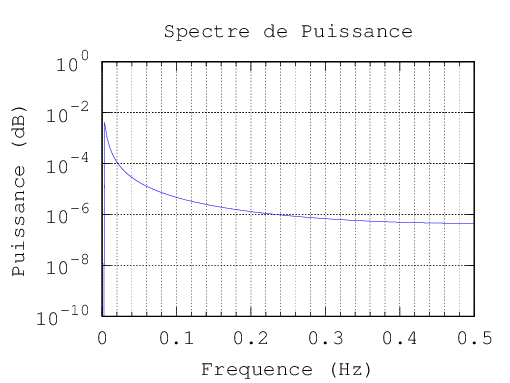

In [5]:
%%matlab

%% définition de la ligne de base
base = 0.1*(ech-mean(ech))/mean(ech);

%% représentation en temps
figure
plot(ech,base)
xlim([-1 max(ech)+1])
ylim([-0.6 0.7])
xlabel('Temps (s)')
ylabel('a.u')

%% représentation en fréquence
figure
[ech_f,base_f,base_af,base_pu] = Analyse_Frequence_Puissance(base,ech);
ylim([10^(-10) 1])

#### 6. Mélange de signaux. 
On va maintenant mélanger nos différentes signaux, tel qu'indiqué ci-dessous. Représentez les trois mélanges en temps et en fréquence, superposé au signal d'intérêt sans aucun bruit (variable `signal`). Pouvez-vous reconnaitre la contribution de chaque source dans le mélange fréquentiel? Est ce que les puissances de fréquences s'additionnent systématiquement?

In [6]:
%%matlab

%% Mélanges de signaux
y_sr   = signal + resp;
y_srb  = signal + resp + bruit;
y_srbb = signal + resp + bruit + base;

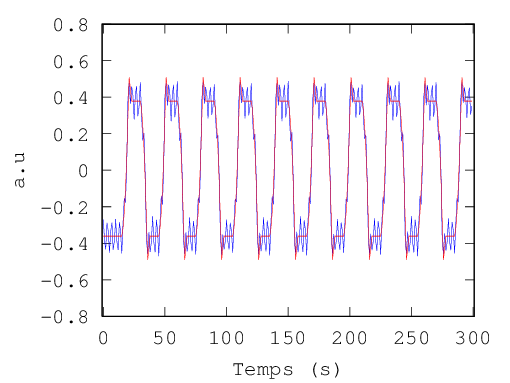

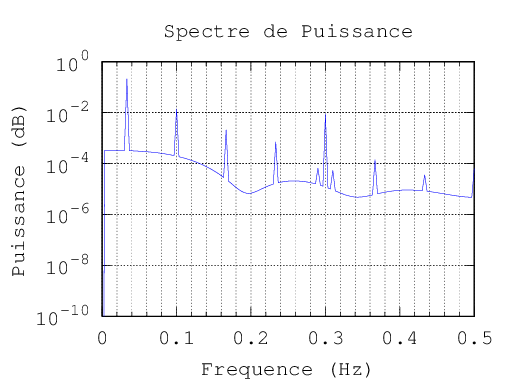

In [7]:
%%matlab
y = y_sr;
% représentation en temps
figure
plot(ech,y)
hold on
plot(ech,signal,'r')
xlim([-1 301])
ylim([-0.8 0.8])
xlabel('Temps (s)')
ylabel('a.u')

% représentation en fréquence
figure
[freq_f,y_f,y_af,y_pu] = Analyse_Frequence_Puissance(y,ech);
ylim([10^(-10) 1])

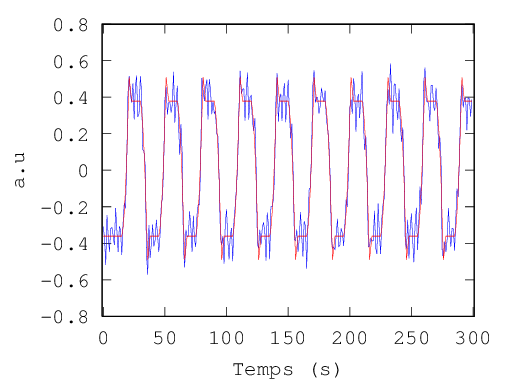

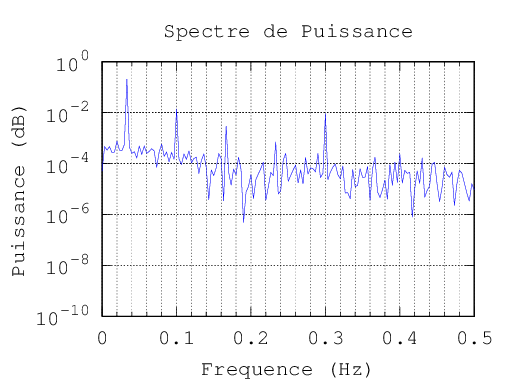

In [8]:
%%matlab
y = y_srb;
% représentation en temps
figure
plot(ech,y)
hold on
plot(ech,signal,'r')
xlim([-1 301])
ylim([-0.8 0.8])
xlabel('Temps (s)')
ylabel('a.u')

% représentation en fréquence
figure
[freq_f,y_f,y_af,y_pu] = Analyse_Frequence_Puissance(y,ech);
ylim([10^(-10) 1])

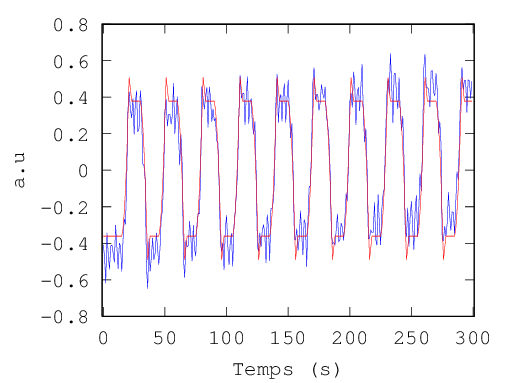

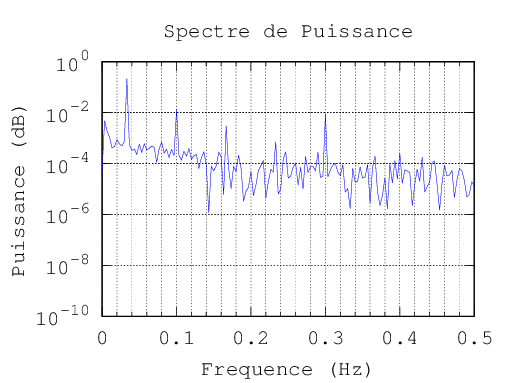

In [9]:
%%matlab
y = y_srbb;
% représentation en temps
figure
plot(ech,y)
hold on
plot(ech,signal,'r')
xlim([-1 301])
ylim([-0.8 0.8])
xlabel('Temps (s)')
ylabel('a.u')

% représentation en fréquence
figure
[freq_f,y_f,y_af,y_pu] = Analyse_Frequence_Puissance(y,ech);
ylim([10^(-10) 1])

### Section 2: Optimisation de filtre

#### 2.1. Nous allons commencer par appliquer un filtre de moyenne mobile, avec le signal le plus simple (`y_sr`).
Pour cela on crée un noyau et on applique une convolution, comme indiqué ci dessous. Représentez le noyau en fréquence (avec `Analyse_Frequence_Puissance`), commentez sur l'impact fréquentiel de la convolution. Faire un deuxième graphe représentant le signal d'intérêt superposé au signal filtré. 

err =  0.030706


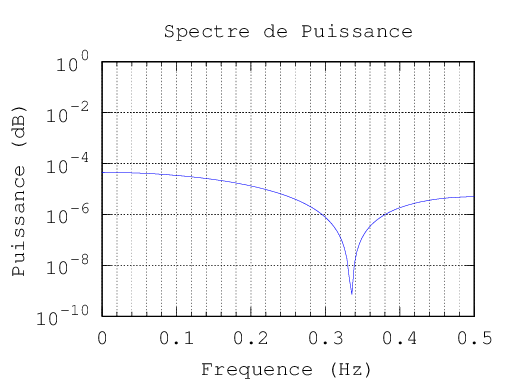

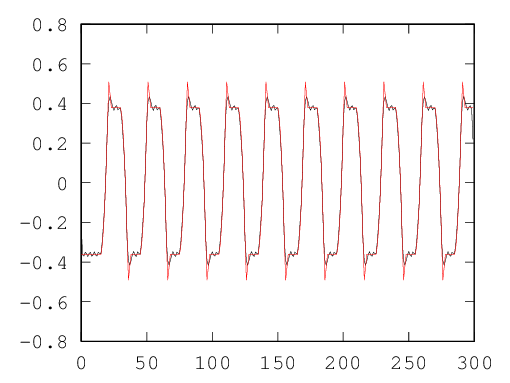

In [10]:
%%matlab
%%définition d'un noyau de moyenne mobile
% taille de la fenêtre pour la moyenne mobile, en nombre d'échantillons temporels
taille = ceil(3*freq);
% le noyau, défini sur une fenêtre identique aux signaux précédents
noyau = [zeros(1,(length(signal)-taille)/2) ones(1,taille) zeros(1,(length(signal)-taille)/2)];
% normalisation du moyau
noyau = noyau/sum(abs(noyau));
% convolution avec le noyau (filtrage)
y_f = conv(y_sr,noyau,'same');

%% Représentation fréquentielle du filtre
figure
Analyse_Frequence_Puissance(noyau,ech);
ylim([10^(-10) 1])

%% représentation du signal filtré
figure
plot(ech,y_f,'k')
hold on
plot(ech,signal,'r')

%% erreur résiduelle
err = sqrt(mean((signal-y_f).^2))

#### 2.2 Répétez la question 2.1 avec un noyau plus gros.
Commentez qualitativement sur la qualité du débruitage.

err =  0.076207


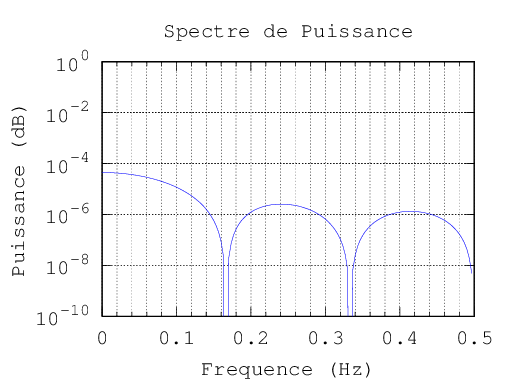

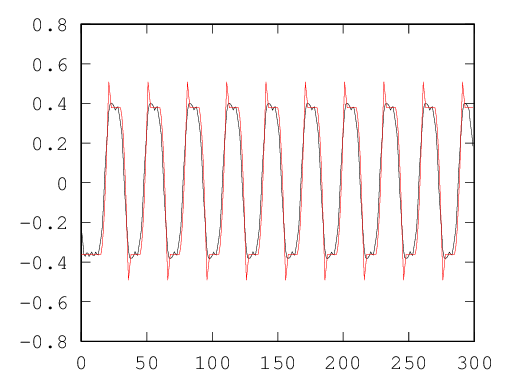

In [11]:
%%matlab
%%définition d'un noyau de moyenne mobile
% taille de la fenêtre pour la moyenne mobile, en nombre d'échantillons temporels
taille = ceil(6*freq);
% le noyau, défini sur une fenêtre identique aux signaux précédents
noyau = [zeros(1,(length(signal)-taille)/2) ones(1,taille) zeros(1,(length(signal)-taille)/2)];
% normalisation du moyau
noyau = noyau/sum(abs(noyau));
% convolution avec le noyau (filtrage)
y_f = conv(y_sr,noyau,'same');

%% Représentation fréquentielle du filtre
figure
Analyse_Frequence_Puissance(noyau,ech);
ylim([10^(-10) 1])

%% représentation du signal filtré
figure
plot(ech,y_f,'k')
hold on
plot(ech,signal,'r')

%% erreur résiduelle
err = sqrt(mean((signal-y_f).^2))

#### 2.3 Nous allons maintenant appliquer des filtres de Butterworth.
Ces filtres sont disponibles dans des fonctions que vous avez déjà utilisé lors du laboratoire sur la transformée de Fourier:
 - `FiltrePasseHaut.m`: suppression des basses fréquences.
 - `FiltrePasseBas.m`: suppression des hautes fréquences.
 
Le filtre de Butterworth n'utilise pas explicitement un noyau de convolution. Mais comme il s'agit d'un systéme linéaire invariant dans le temps, on peut toujours récupérer le noyau en regardant la réponse à une impulsion finie unitaire. Représentez le noyau en temps et en fréquence. Quelle est la fréquence de coupure du filtre?

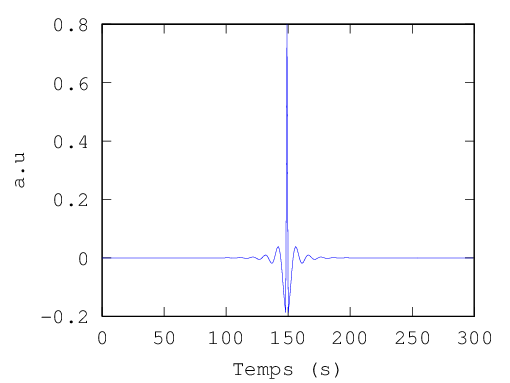

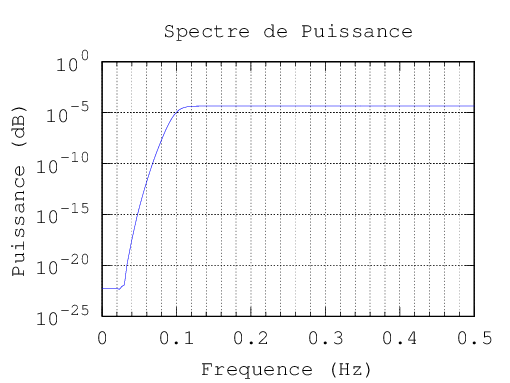

In [12]:
%%matlab

%% Définition d'une implusion finie unitaire
impulsion = zeros(size(signal));
impulsion(round(length(impulsion)/2))=1;
noyau = FiltrePasseHaut(impulsion,freq,0.1);

%% représentation temporelle
figure
plot(ech,noyau)
xlabel('Temps (s)')
ylabel('a.u')

%% représentation fréquentielle
figure
Analyse_Frequence_Puissance(noyau,ech);
set(gca,'yscale','log');

#### 2.4. Application du filtre de Butterworth.
L'exemple ci dessous filtre le signal avec un filtre passe bas, avec une fréquence de coupure de 0.1. Faire un graphe représentant le signal d'intérêt (`signal`) superposé au signal filtré. Calculez l'erreur résiduelle, et comparez au filtre par moyenne mobile évalué précédemment.

err =  0.061297


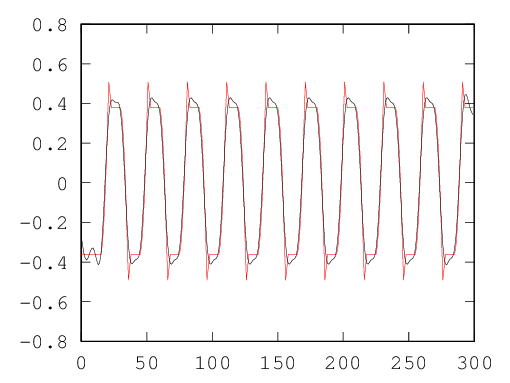

In [13]:
%%matlab
y = y_sr;
y_f = FiltrePasseBas(y,freq,0.1);

%%représentation du signal filtré
plot(ech,signal,'r')
hold on
plot(ech,y_f,'k')
err = sqrt(mean((signal-y_f).^2))

#### 2.5. Optimisation du filtre de Butterworth.
Trouvez une combinaison de filtre passe-haut et de filtre passe-bas de Butterworth qui permette d'améliorer l'erreur résiduelle par rapport au filtre de moyenne mobile. Faire un graphe représentant le signal d'intérêt (signal) superposé au signal filtré, et un second avec le signal d'intérêt superposé au signal bruité, pour référence.

err =  0.030706
err =  0.014540


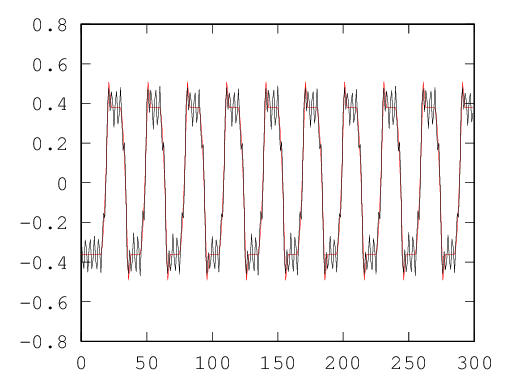

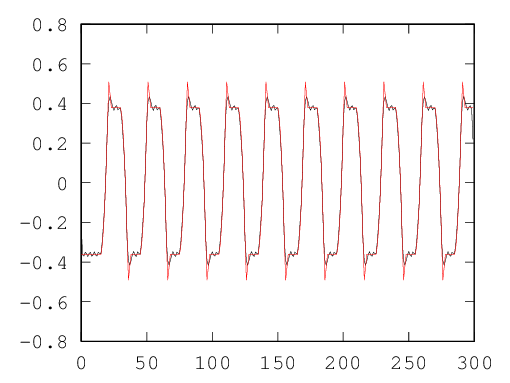

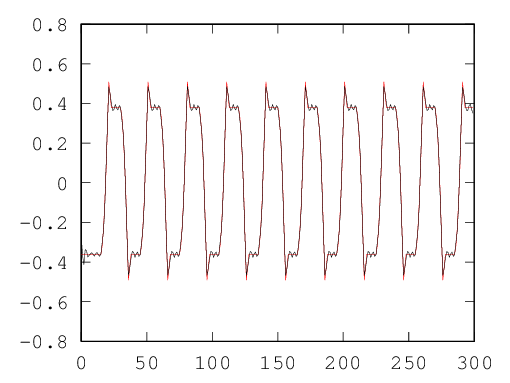

In [14]:
%%matlab
y = y_sr;

%%définition d'un noyau de moyenne mobile
% taille de la fenêtre pour la moyenne mobile, en nombre d'échantillons temporels
taille = ceil(3*freq);
% le noyau, défini sur une fenêtre identique aux signaux précédents
noyau = [zeros(1,(length(signal)-taille)/2) ones(1,taille) zeros(1,(length(signal)-taille)/2)];
% normalisation du moyau
noyau = noyau/sum(abs(noyau));
% convolution avec le noyau (filtrage)
y_f = conv(y,noyau,'same');

%% représentation du signal brut
figure
plot(ech,signal,'r')
hold on
plot(ech,y,'k')

%% représentation du signal filtré
figure
plot(ech,y_f,'k')
hold on
plot(ech,signal,'r')
err = sqrt(mean((signal-y_f).^2))

%% filtre de Butterworth
y_f = FiltrePasseHaut(y,freq,0.35);
y_f = y_f+FiltrePasseBas(y,freq,0.25);

%% représentation du signal filtré
figure
plot(ech,signal,'r')
hold on
plot(ech,y_f,'k')
err = sqrt(mean((signal-y_f).^2))

#### 2.6 Optionnel: autres exemples.
Recommencez les questions 2.1 et 2.5, avec les signaux `y_srb` et `y_srbb`.

err =  0.039602
err =  0.037885


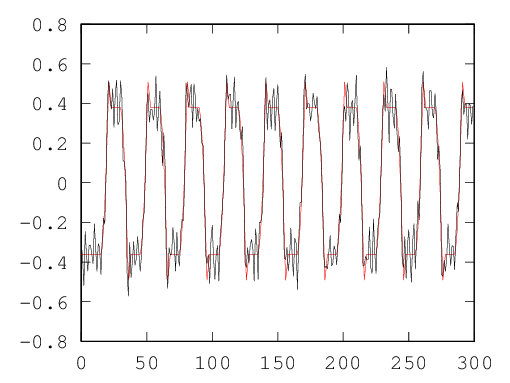

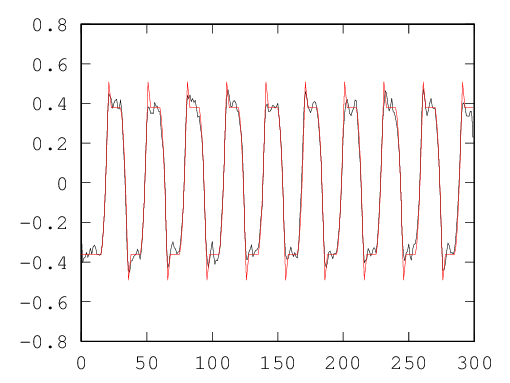

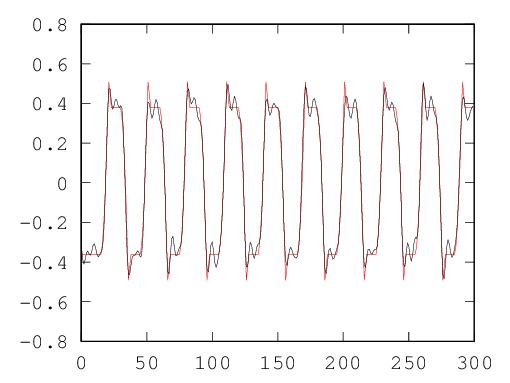

In [15]:
%%matlab
y = y_srb;

%%définition d'un noyau de moyenne mobile
% taille de la fenêtre pour la moyenne mobile, en nombre d'échantillons temporels
taille = ceil(3*freq);
% le noyau, défini sur une fenêtre identique aux signaux précédents
noyau = [zeros(1,(length(signal)-taille)/2) ones(1,taille) zeros(1,(length(signal)-taille)/2)];
% normalisation du moyau
noyau = noyau/sum(abs(noyau));
% convolution avec le noyau (filtrage)
y_f = conv(y,noyau,'same');

%% représentation du signal brut
figure
plot(ech,signal,'r')
hold on
plot(ech,y,'k')

%% représentation du signal filtré
figure
plot(ech,y_f,'k')
hold on
plot(ech,signal,'r')

%% erreur résiduelle
err = sqrt(mean((signal-y_f).^2))

%signal+base+resp+bruit
y_f = FiltrePasseBas(y,freq,0.2);

%% représentation du signal filtré
figure
plot(ech,signal,'r')
hold on
plot(ech,y_f,'k')
err = sqrt(mean((signal-y_f).^2))

err =  0.069928
err =  0.064349


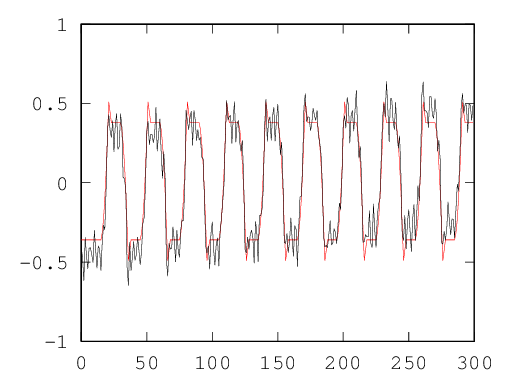

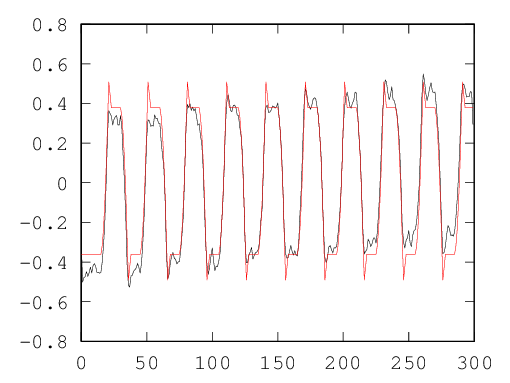

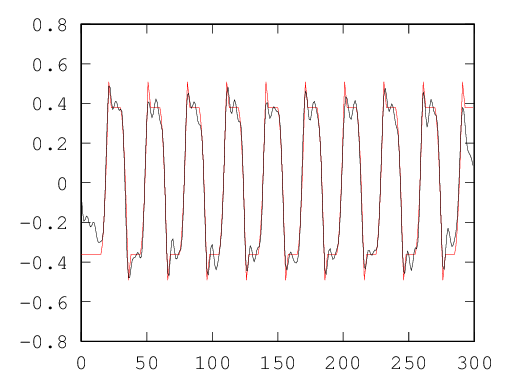

In [16]:
%%matlab
y = y_srbb;

%%définition d'un noyau de moyenne mobile
% taille de la fenêtre pour la moyenne mobile, en nombre d'échantillons temporels
taille = ceil(3*freq);
% le noyau, défini sur une fenêtre identique aux signaux précédents
noyau = [zeros(1,(length(signal)-taille)/2) ones(1,taille) zeros(1,(length(signal)-taille)/2)];
% normalisation du moyau
noyau = noyau/sum(abs(noyau));
% convolution avec le noyau (filtrage)
y_f = conv(y,noyau,'same');

%% représentation du signal brut
figure
plot(ech,signal,'r')
hold on
plot(ech,y,'k')

%% représentation du signal filtré
figure
plot(ech,y_f,'k')
hold on
plot(ech,signal,'r')

%% erreur résiduelle
err = sqrt(mean((signal-y_f).^2))

%signal+base+resp+bruit
y_f = FiltrePasseHaut(y,freq,0.02);
y_f = FiltrePasseBas(y_f,freq,0.2);

%% représentation du signal filtré
figure
plot(ech,signal,'r')
hold on
plot(ech,y_f,'k')
err = sqrt(mean((signal-y_f).^2))